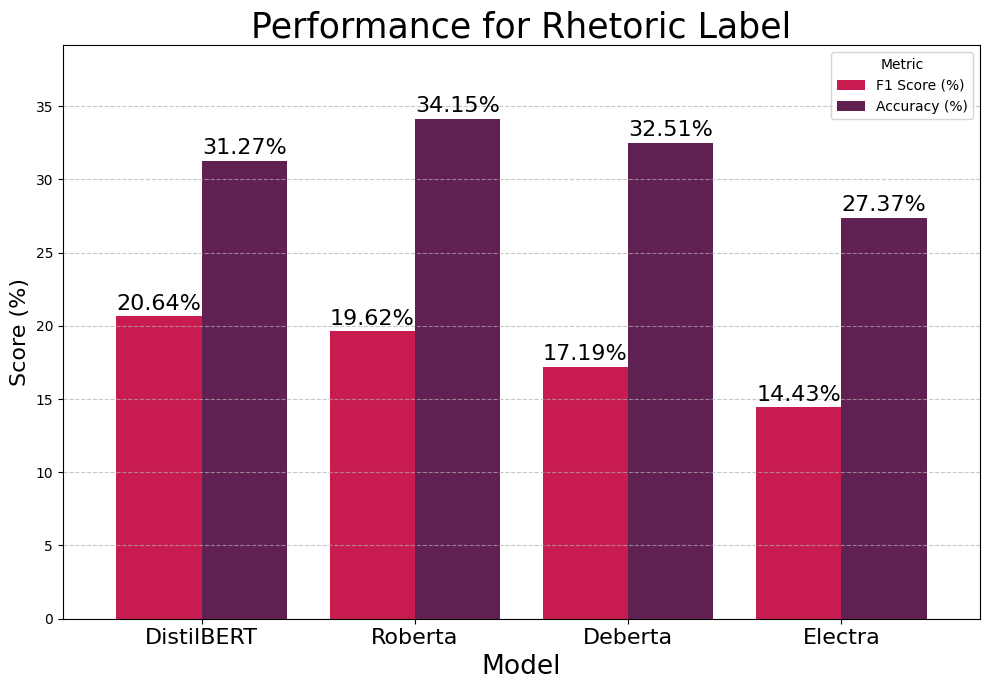

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# We assume the first percentage is the F1 Score and the second is the Accuracy Score.
# The data is structured in a dictionary, which is an easy way to create a DataFrame.
data = {
    'Model': [
        'DistilBERT', 
        'Deberta', 
        'Electra',
        'Roberta'
    ],
    'F1 Score (%)': [20.64, 17.19, 14.43, 19.62],
    'Accuracy (%)': [31.27, 32.51, 27.37, 34.15]
}

# 2. Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# 3. Set the 'Model' column as the index. 
# This tells pandas to use the model names as the labels for the x-axis groups.
df_plot = df.set_index('Model').sort_values(by='F1 Score (%)', ascending=False)

# 4. Generate the side-by-side bar plot
# pandas .plot() function uses matplotlib in the background.
ax = df_plot.plot(
    kind='bar',                  # Specify a bar chart
    figsize=(10, 7),             # Set the figure size for better readability
    color= ['#C81C50','#602052'],
    width=0.8                    # Set the width of the bars
)

# 5. Customize the plot for clarity
plt.title('Performance for Rhetoric Label', fontsize=25)
plt.ylabel('Score (%)', fontsize=16)
plt.xlabel('Model', fontsize=19)
plt.xticks(rotation=0,fontsize=16) # Keep the model names horizontal
plt.ylim(0, df['Accuracy (%)'].max() + 5) # Add some space at the top
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid
plt.legend(title='Metric') # Add a legend to distinguish the scores

# 6. Add the value labels on top of each bar for precise comparison
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%',                             # The text to display (formatted to 2 decimal places)
        (p.get_x() + p.get_width() / 2., p.get_height()),     # The (x, y) coordinates of the text
        ha='center',                                         # Horizontal alignment
        va='center',                                         # Vertical alignment
        xytext=(0, 9),                                       # Offset the text slightly above the bar
        textcoords='offset points',
        fontsize=16
    )

# 7. Display the plot
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.show()

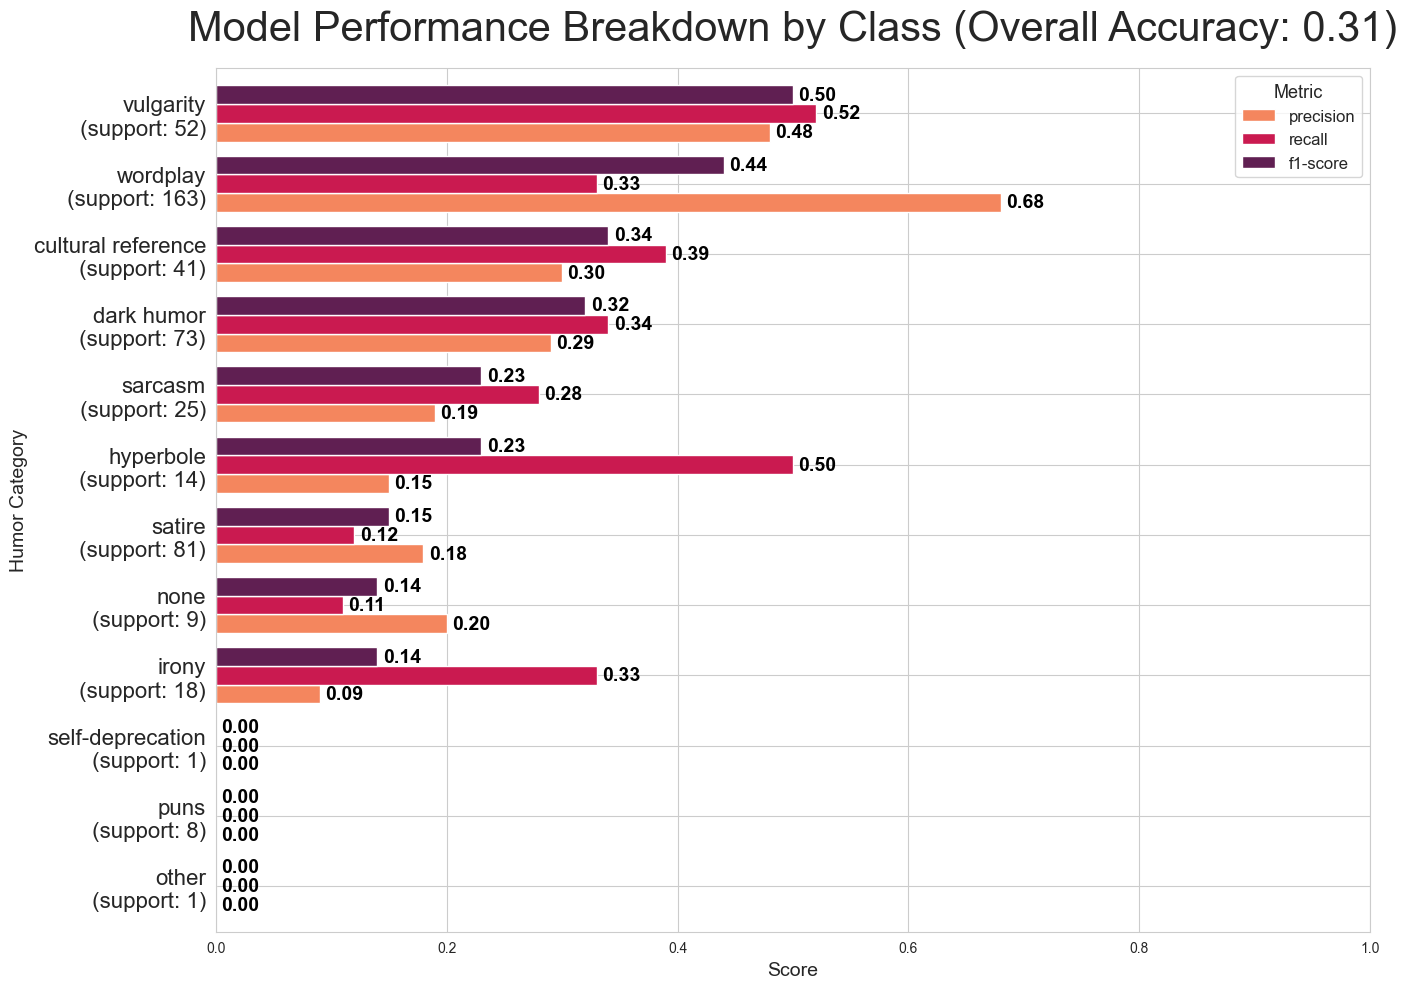

--- Per-Class Performance Data ---
                    precision  recall  f1-score  support
class                                                   
cultural reference       0.30    0.39      0.34       41
dark humor               0.29    0.34      0.32       73
hyperbole                0.15    0.50      0.23       14
irony                    0.09    0.33      0.14       18
none                     0.20    0.11      0.14        9
other                    0.00    0.00      0.00        1
puns                     0.00    0.00      0.00        8
sarcasm                  0.19    0.28      0.23       25
satire                   0.18    0.12      0.15       81
self-deprecation         0.00    0.00      0.00        1
vulgarity                0.48    0.52      0.50       52
wordplay                 0.68    0.33      0.44      163

--- Summary Performance Data ---
              precision  recall  f1-score  support
metric                                            
accuracy            NaN     NaN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# 1. Prepare the data from your image
# Using a string and pd.read_csv is a robust way to parse fixed-width text.
report_text = """
class,precision,recall,f1-score,support
cultural reference,0.30,0.39,0.34,41
dark humor,0.29,0.34,0.32,73
hyperbole,0.15,0.50,0.23,14
irony,0.09,0.33,0.14,18
none,0.20,0.11,0.14,9
other,0.00,0.00,0.00,1
puns,0.00,0.00,0.00,8
sarcasm,0.19,0.28,0.23,25
satire,0.18,0.12,0.15,81
self-deprecation,0.00,0.00,0.00,1
vulgarity,0.48,0.52,0.50,52
wordplay,0.68,0.33,0.44,163
"""

summary_text = """
metric,precision,recall,f1-score,support
accuracy,NaN,NaN,0.31,486
macro avg,0.21,0.24,0.21,486
weighted avg,0.40,0.31,0.33,486
"""

# 2. Create DataFrames using pandas
# For per-class scores
df_classes = pd.read_csv(io.StringIO(report_text)).set_index('class')

# For summary scores
df_summary = pd.read_csv(io.StringIO(summary_text)).set_index('metric')


# --- Visualization ---

# 3. Prepare data for plotting
# We will visualize the scores for each class.
# Let's drop the 'support' column for the plot and sort by f1-score for better visual hierarchy.
df_plot = df_classes.drop('support', axis=1).sort_values(by='f1-score', ascending=True)

# Set a nice visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10) # Set figure size for better readability

# 4. Create the horizontal bar plot
ax = df_plot.plot(
    kind='barh', # Horizontal bar chart
    width=0.8,   # Adjust bar width
    color=sns.color_palette('rocket_r', n_colors=3) # Use a pleasant color palette
)

# 5. Customize the plot for clarity
# Get the overall accuracy to put in the title
accuracy = df_summary.loc['accuracy', 'f1-score']
plt.title(f'Model Performance Breakdown by Class (Overall Accuracy: {accuracy:.2f})', fontsize=30, pad=20)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Humor Category', fontsize=14)
plt.xlim(0, 1.0) # Scores are between 0 and 1
plt.legend(title='Metric', fontsize=12, title_fontsize=13)

# 6. Add context-rich labels to the y-axis (Class Name + Support Count)
# We get the support counts from the original dataframe in the new sorted order
support_counts = df_classes.reindex(df_plot.index)['support']
new_yticklabels = [f"{label}\n (support: {count})" for label, count in support_counts.items()]
ax.set_yticklabels(new_yticklabels,fontsize=16)

# 7. Add value labels on each bar for precision
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f',      # Format to 2 decimal places
        label_type='edge',
        padding=4,       # Space between bar and label
        fontsize=14,
        color='black',
        fontweight='bold'
    )

plt.tight_layout() # Adjust layout to make sure everything fits
plt.show()

# (Optional) Display the DataFrames to see the structured data
print("--- Per-Class Performance Data ---")
print(df_classes)
print("\n--- Summary Performance Data ---")
print(df_summary)

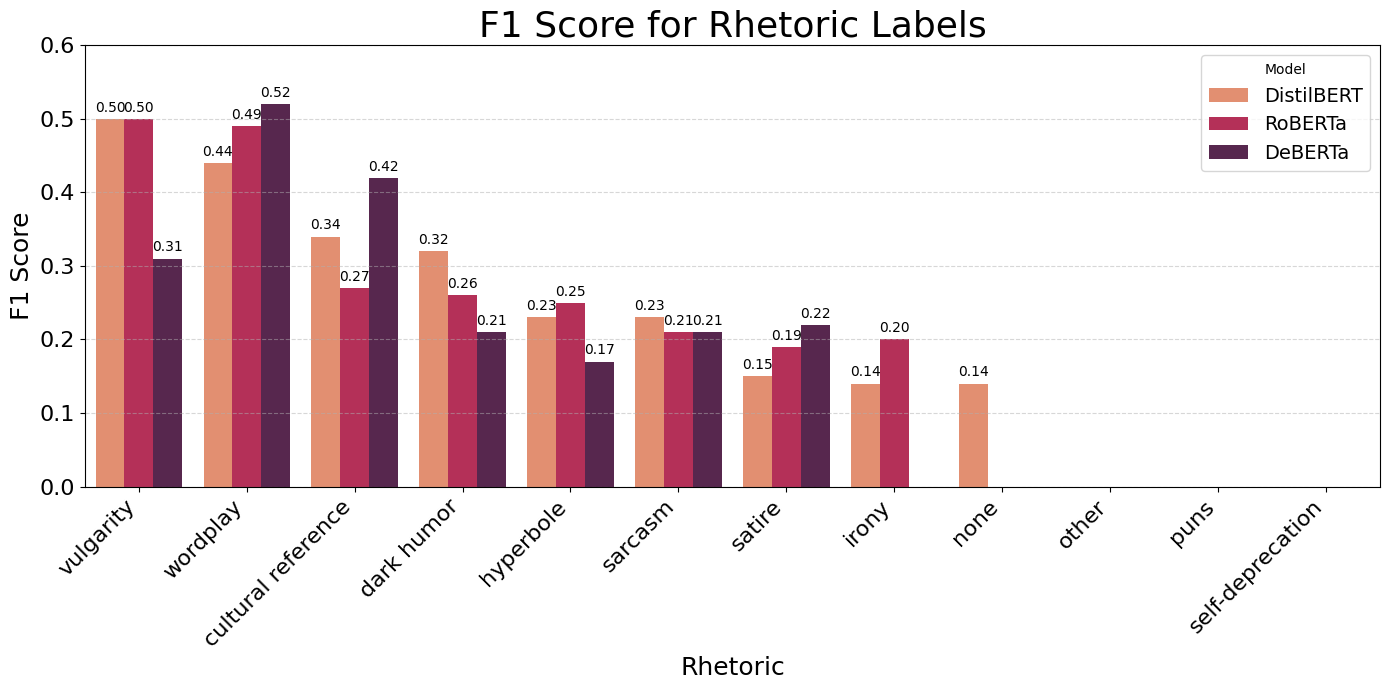

In [32]:
import pandas as pd
import numpy as np

# Extract data from the four classification reports
# First report - DistilBERT
distilbert_data = {
    'Label': ['cultural reference', 'dark humor', 'hyperbole', 'irony', 'none', 'other', 'puns', 'sarcasm', 'satire', 'self-deprecation', 'vulgarity', 'wordplay'],
    'F1-Score': [0.34, 0.32, 0.23, 0.14, 0.14, 0.00, 0.00, 0.23, 0.15, 0.00, 0.50, 0.44]
}

# Second report - DeBERTa
deberta_data = {
    'Label': ['cultural reference', 'dark humor', 'hyperbole', 'irony', 'none', 'other', 'puns', 'sarcasm', 'satire', 'self-deprecation', 'vulgarity', 'wordplay'],
    'F1-Score': [0.42, 0.21, 0.17, 0.00, 0.00, 0.00, 0.00, 0.21, 0.22, 0.00, 0.31, 0.52]
}

# Third report - ELECTRA
electra_data = {
    'Label': ['cultural reference', 'dark humor', 'hyperbole', 'irony', 'none', 'other', 'puns', 'sarcasm', 'satire', 'self-deprecation', 'vulgarity', 'wordplay'],
    'F1-Score': [0.15, 0.07, 0.19, 0.18, 0.00, 0.00, 0.00, 0.10, 0.12, 0.00, 0.41, 0.51]
}

# Fourth report - RoBERTa
roberta_data = {
    'Label': ['cultural reference', 'dark humor', 'hyperbole', 'irony', 'none', 'other', 'puns', 'sarcasm', 'satire', 'self-deprecation', 'vulgarity', 'wordplay'],
    'F1-Score': [0.27, 0.26, 0.25, 0.20, 0.00, 0.00, 0.00, 0.21, 0.19, 0.00, 0.50, 0.49]
}

# Create DataFrames
df_distilbert = pd.DataFrame(distilbert_data)
df_deberta = pd.DataFrame(deberta_data)
df_electra = pd.DataFrame(electra_data)
df_roberta = pd.DataFrame(roberta_data)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all model data
comparison_data = {
    'Label': distilbert_data['Label'],
    'DistilBERT': distilbert_data['F1-Score'],
    'RoBERTa': roberta_data['F1-Score'],
    'DeBERTa': deberta_data['F1-Score']
    # 'ELECTRA': electra_data['F1-Score'],
    
}
df_comparison = pd.DataFrame(comparison_data)

# Sort by DistilBERT descending
df_sorted = df_comparison.sort_values(by='DistilBERT', ascending=False)

# Melt for seaborn
df_melted = df_sorted.melt(id_vars='Label', var_name='Model', value_name='F1-Score')

# Plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_melted, x='Label', y='F1-Score', hue='Model', palette=sns.color_palette('rocket_r', n_colors=3))

# Style
plt.title('F1 Score for Rhetoric Labels',fontsize=26)
plt.xticks(rotation=45, ha='right',fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("F1 Score",fontsize=18)
plt.xlabel("Rhetoric",fontsize=18)
plt.ylim(0, 0.6)
plt.tight_layout()
plt.legend(title='Model',fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on each bar
for container in ax.containers:
    labels = [f'{v:.2f}' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(
        container,
        labels=labels,
        label_type='edge',
        padding=3,
        fontsize=10,
        color='black'
    )

plt.show()


In [10]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("gold_labels_deduplicated.csv")
df = df.loc[:, ~df.columns.str.startswith("Unnamed")]
df = df[["gold_rhetoric","gold_target","gold_label"]]
df = df.rename(columns = {"gold_rhetoric":"rhetoric","gold_target":"target","gold_label":"label" })
df = df.apply(lambda col: col.str.lower() if col.dtype == 'object' or pd.api.types.is_string_dtype(col) else col)


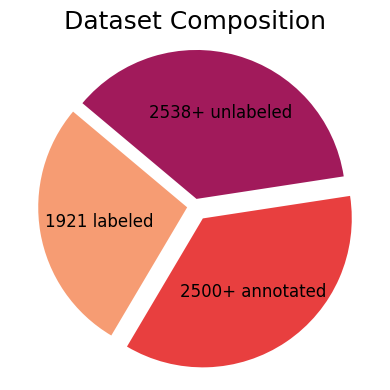

In [127]:
import matplotlib.pyplot as plt

# Data
sizes = [1921, 2500, 2538]
labels = ['Labeled (original)', 'Labeled (additional)', 'Unlabeled (test)']
colors = sns.color_palette('rocket_r', n_colors=4)
explode = (0.05, 0.1, 0.05)

# Format function to show exact numbers
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        if val == 1921:
            return f'{val} labeled'
        if val == 2500:
            return f'{val}+ annotated'
        if val == 2538:
            return f'{val}+ unlabeled'
    return my_autopct

# Plot
plt.figure(figsize=(4, 4))
plt.pie(sizes, colors=colors, explode=explode,
        autopct=make_autopct(sizes), startangle=140, textprops={'fontsize': 12})

plt.title('Dataset Composition', fontsize=18)
plt.axis('equal')  # Circle shape
plt.tight_layout()
plt.show()


/var/folders/c0/9zn5f8690jd2h7z_c3t7vqxw0000gn/T/ipykernel_48062/3363918073.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here
/var/folders/c0/9zn5f8690jd2h7z_c3t7vqxw0000gn/T/ipykernel_48062/3363918073.py:24: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here


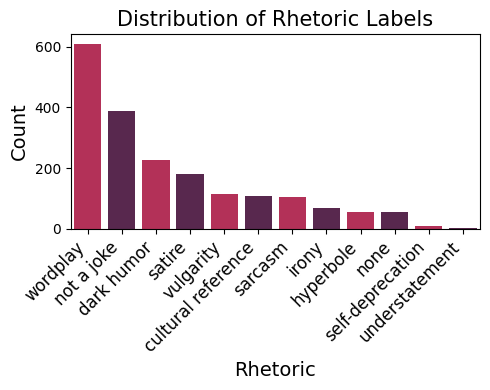

In [153]:
#  EDA
df['label'] = df['label'].replace('offensive/provocative', 'offensive')
df['target'] = df['target'].replace('ethnicity/national origin', 'ethnicity')
df['target'] = df['target'].replace('disability/health', 'disability')

categorical_cols = df.iloc[:,:1]

# for col in categorical_cols:
#     print(f"\nColumn: {col}")
#     print(df[col].value_counts(normalize=True))  # Relative frequencies

import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#c81c50','#602052']
# colors = ['#f2865e','#c81c50']
# colors = ['#602052','#dd2c45']

['#f6c19f', '#f5946b', '#f06043', '#dd2c45', '#b41658', '#841e5a', '#541e4e', '#2a1636']


for col in categorical_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here
    plt.title(f"Distribution of Rhetoric Labels",fontsize=15)
    plt.xticks(rotation=45, fontsize=12, ha='right')
    plt.xlabel('Rhetoric',fontsize=14)
    plt.ylabel("Count",fontsize=14)
    plt.tight_layout()
    plt.show()


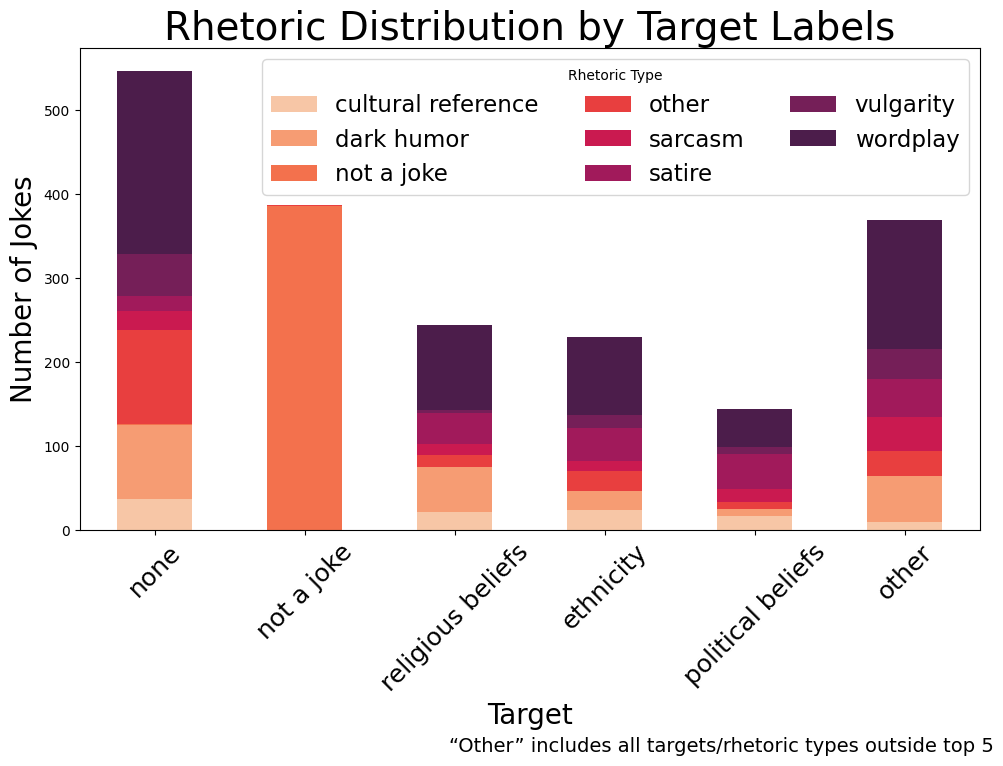

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy to avoid changing original
df_clean = df.copy()

# Convert to lowercase (optional but consistent)
df_clean['target'] = df_clean['target'].str.lower()
df_clean['rhetoric'] = df_clean['rhetoric'].str.lower()

# Step 1: Collapse targets not in top 5 to "other"
top_targets = df_clean['target'].value_counts().nlargest(5).index
df_clean['target_grouped'] = df_clean['target'].where(df_clean['target'].isin(top_targets), other='other')

# Step 2: Collapse rhetoric not in top 5 to "other"
top_rhetoric = df_clean['rhetoric'].value_counts().nlargest(7).index
df_clean['rhetoric_grouped'] = df_clean['rhetoric'].where(df_clean['rhetoric'].isin(top_rhetoric), other='other')

# Step 3: Pivot table: rows = target_grouped, columns = rhetoric_grouped
pivot = df_clean.pivot_table(index='target_grouped', columns='rhetoric_grouped', aggfunc='size', fill_value=0)

# Optional: sort rows to keep top 5 + "other" in order
ordered_index = list(top_targets) + ['other']
pivot = pivot.reindex(index=ordered_index)

colors=sns.color_palette('rocket_r', n_colors=9)

# Step 4: Plot
pivot.plot(kind='bar', stacked=True, figsize=(10, 7.5),color=colors)

plt.title('Rhetoric Distribution by Target Labels',fontsize=28)
plt.xlabel('Target',fontsize=20)
plt.xticks(rotation=45,fontsize=18)
plt.ylabel('Number of Jokes',fontsize=20)
plt.legend(
    title='Rhetoric Type',
    loc='upper right',
    fontsize=16.5,
    ncol=3,  # 3 columns, so legend will be in 2 rows if you have ≤8 items
    bbox_to_anchor=(1, 1)  # move legend above plot to avoid overlap
)
plt.tight_layout()
plt.figtext(0.999, -0.01, '“Other” includes all targets/rhetoric types outside top 5', ha='right', fontsize=14)
plt.show()


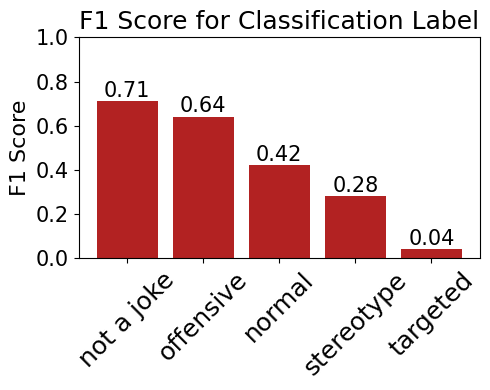

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Classification categories and F1 scores
categories = ['normal', 'not a joke', 'offensive', 'stereotype', 'targeted']
f1_scores = [0.42, 0.71, 0.64, 0.28, 0.04]

# Sort by F1 score descending
sorted_pairs = sorted(zip(categories, f1_scores), key=lambda x: x[1], reverse=True)
categories_sorted, f1_sorted = zip(*sorted_pairs)

# Color selection
color = 'firebrick'

# Plot
fig, ax = plt.subplots(figsize=(5, 4))
bars = ax.bar(categories_sorted, f1_sorted, color=color)

# Add F1 score labels on top of each bar
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
            f'{bar.get_height():.2f}', ha='center', fontsize=15)

# Axis and title styling
ax.set_ylabel('F1 Score', fontsize=16)
ax.set_title('F1 Score for Classification Label', fontsize=18)
ax.set_ylim(0, 1)
ax.grid(False)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45, fontsize=18)
plt.tight_layout()
plt.show()


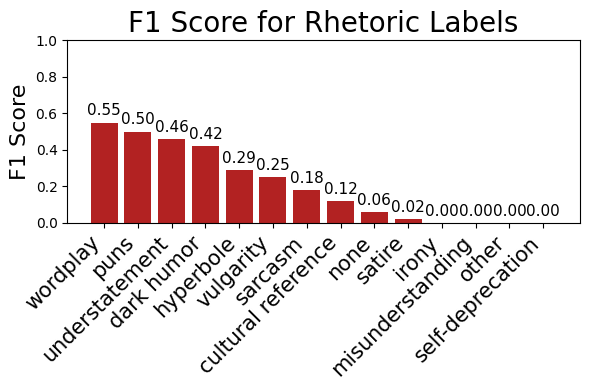

In [225]:
import matplotlib.pyplot as plt
import numpy as np

# Original data
categories = [' cultural reference', 'dark humor', 'hyperbole', 'irony', 'misunderstanding', 'none', 'other',
              'puns', 'sarcasm', 'satire', 'self-deprecation', 'understatement', 'vulgarity', 'wordplay']
f1_scores = [0.12, 0.42, 0.29, 0.00, 0.00, 0.06, 0.00, 0.50, 0.18, 0.02, 0.00, 0.46, 0.25, 0.55]

# Strip whitespace and sort descending by F1 score
categories = [c.strip() for c in categories]
sorted_pairs = sorted(zip(categories, f1_scores), key=lambda x: x[1], reverse=True)
categories_sorted, f1_sorted = zip(*sorted_pairs)

# Set up x-axis positions
x = np.arange(len(categories_sorted))

# Create plot
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(x, f1_sorted, color='firebrick', label='F1 Score')

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=11)

# Customize chart
ax.set_ylabel('F1 Score', fontsize=16)
# ax.set_xlabel('Rhetoric Labels', fontsize=16)
ax.set_title('F1 Score for Rhetoric Labels', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(categories_sorted, rotation=45, ha='right', fontsize=15)
ax.set_ylim(0, 1)
# ax.legend(fontsize=13)
plt.tight_layout()
plt.show()


/var/folders/c0/9zn5f8690jd2h7z_c3t7vqxw0000gn/T/ipykernel_48062/152616721.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories_sorted, rotation=45, ha='right')


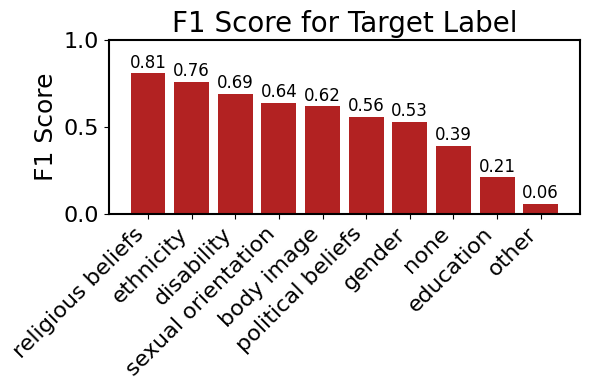

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
categories = [
    'body image', 'disability', 'education', 'ethnicity',
    'gender', 'none', 'other', 'political beliefs', 'religious beliefs', 'sexual orientation'
]
f1_scores = [0.62, 0.69, 0.21, 0.76, 0.53, 0.39, 0.06, 0.56, 0.81, 0.64]

# Sort by F1 score descending
sorted_pairs = sorted(zip(categories, f1_scores), key=lambda x: x[1], reverse=True)
categories_sorted, f1_scores_sorted = zip(*sorted_pairs)

# Custom color: use seaborn rocket_r, highlight "none" color if needed
colors = sns.color_palette("rocket_r", len(categories))
bar_color = [colors[4]] * len(categories_sorted)  # consistent color (adjust index if needed)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(categories_sorted, f1_scores_sorted, color='firebrick')

# Value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=12)

# Formatting
ax.set_ylabel('F1 Score', fontsize=18)
ax.set_title('F1 Score for Target Label', fontsize=20)
ax.set_ylim(0, 1)
ax.tick_params(labelsize=16)
ax.set_xticklabels(categories_sorted, rotation=45, ha='right')

# Optional: darker border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


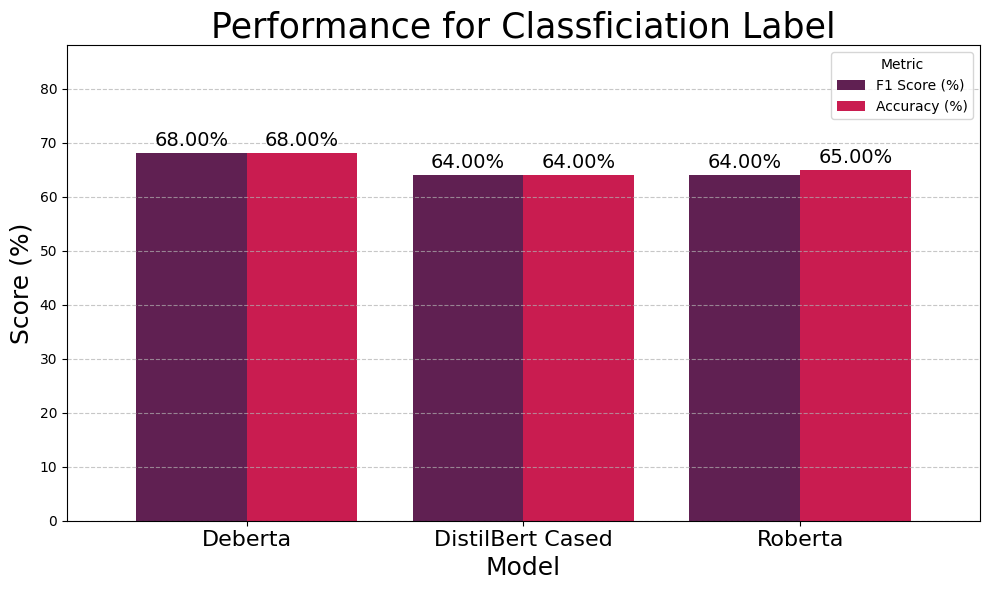

--- Data in Pandas DataFrame ---
              Model  F1 Score (%)  Accuracy (%)
0           Deberta            68            68
1  DistilBert Cased            64            64
2           Roberta            64            65


In [224]:
import pandas as pd
import matplotlib.pyplot as plt
# 1. Prepare the data
# We assume the first percentage is the F1 Score and the second is the Accuracy Score.
# The data is structured in a dictionary, which is an easy way to create a DataFrame.
data = {
    'Model': [
        'Deberta',
        'DistilBert Cased',
        'Roberta' # Shortened for better chart labeling
    ],
    'F1 Score (%)': [68, 64, 64],
    'Accuracy (%)': [68, 64, 65]
}
# 2. Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)
# 3. Set the 'Model' column as the index.
# This tells pandas to use the model names as the labels for the x-axis groups.
df_plot = df.set_index('Model')
# 4. Generate the side-by-side bar plot
# pandas .plot() function uses matplotlib in the background.
ax = df_plot.plot(
    kind='bar',                  # Specify a bar chart
    figsize=(10,6),             # Set the figure size for better readability
    color=['#602052', '#C91C50'],# Assign distinct colors to the bars
    width=0.8                    # Set the width of the bars
)
# 5. Customize the plot for clarity
plt.title('Performance for Classficiation Label', fontsize=25)
plt.ylabel('Score (%)', fontsize=18)
plt.xlabel('Model', fontsize=18)
plt.xticks(rotation=0,fontsize=16) # Keep the model names horizontal
plt.ylim(0, df['Accuracy (%)'].max() + 20) # Add some space at the top
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid
plt.legend(title='Metric',loc='upper right') # Add a legend to distinguish the scores
# 6. Add the value labels on top of each bar for precise comparison
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%',                             # The text to display (formatted to 2 decimal places)
        (p.get_x() + p.get_width() / 2., p.get_height()),     # The (x, y) coordinates of the text
        ha='center',                                         # Horizontal alignment
        va='center',                                         # Vertical alignment
        xytext=(0, 9),                                       # Offset the text slightly above the bar
        textcoords='offset points',
        fontsize=14
    )
# 7. Display the plot
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.show()
# (Optional) Print the DataFrame to see the underlying data structure
print("--- Data in Pandas DataFrame ---")
print(df)

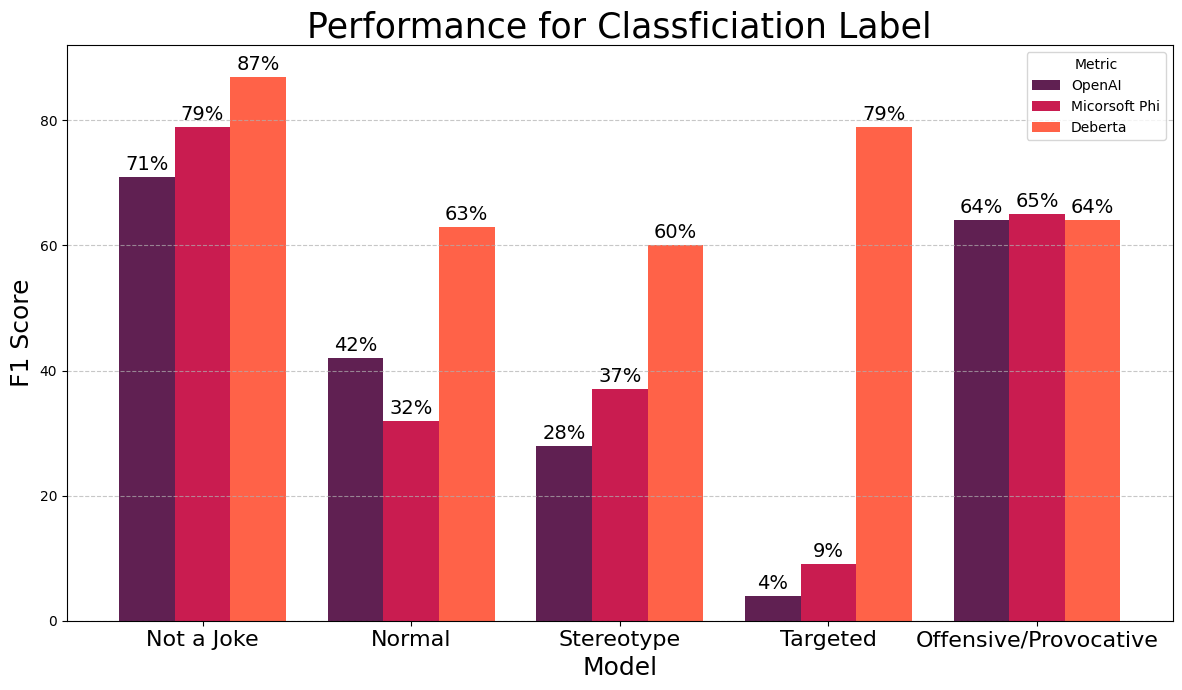

--- Data in Pandas DataFrame ---
                   Model  OpenAI  Micorsoft Phi  Deberta
0             Not a Joke      71             79       87
1                 Normal      42             32       63
2             Stereotype      28             37       60
3               Targeted       4              9       79
4  Offensive/Provocative      64             65       64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# 1. Prepare the data
# We assume the first percentage is the F1 Score and the second is the Accuracy Score.
# The data is structured in a dictionary, which is an easy way to create a DataFrame.
data = {
    'Model': [
        'Not a Joke',
        'Normal',
        'Stereotype',
        'Targeted',
        'Offensive/Provocative',# Shortened for better chart labeling
    ],
    'OpenAI': [71, 42, 28, 4, 64],
    'Micorsoft Phi': [79, 32, 37, 9, 65],
    'Deberta': [87,63,60,79,64]
}
# 2. Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)
# 3. Set the 'Model' column as the index.
# This tells pandas to use the model names as the labels for the x-axis groups.
df_plot = df.set_index('Model')
# 4. Generate the side-by-side bar plot
# pandas .plot() function uses matplotlib in the background.
ax = df_plot.plot(
    kind='bar',                  # Specify a bar chart
    figsize=(12, 7),             # Set the figure size for better readability
    color=['#602052', '#C91C50', '#FF6248'],# Assign distinct colors to the bars
    width=0.8                    # Set the width of the bars
)
# 5. Customize the plot for clarity
plt.title('Performance for Classficiation Label', fontsize=25)
plt.ylabel('F1 Score', fontsize=18)
plt.xlabel('Model', fontsize=18)
plt.xticks(rotation=0,fontsize=16) # Keep the model names horizontal
plt.ylim(0, df['Deberta'].max() + 5) # Add some space at the top
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid
plt.legend(title='Metric',) # Add a legend to distinguish the scores
# 6. Add the value labels on top of each bar for precise comparison
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}%',                             # The text to display (formatted to 2 decimal places)
        (p.get_x() + p.get_width() / 2., p.get_height()),     # The (x, y) coordinates of the text
        ha='center',                                         # Horizontal alignment
        va='center',                                         # Vertical alignment
        # fmt = ".0f",
        xytext=(0, 9),                                       # Offset the text slightly above the bar
        textcoords='offset points',
        fontsize=14
    )
# 7. Display the plot
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.show()
# (Optional) Print the DataFrame to see the underlying data structure
print("--- Data in Pandas DataFrame ---")
print(df)